## 서울시 CCTV - 인구 시각화

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

In [13]:
df = pd.read_csv('../02.Pandas/data/서울시 구별 CCTV 인구 현황.csv', index_col='구별')
df.head()

,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
종로구,1835,28.77,152212,141060,11152,28265,7.33,18.57
중구,2584,34.87,131390,120963,10427,25353,7.94,19.30
용산구,2970,50.81,232482,217756,14726,39478,6.33,16.98
성동구,4040,26.83,287240,280240,7000,48238,2.44,16.79
광진구,3480,34.51,350925,336801,14124,54854,4.02,15.63


##### 1. 자치구별 CCTV 설치댓수

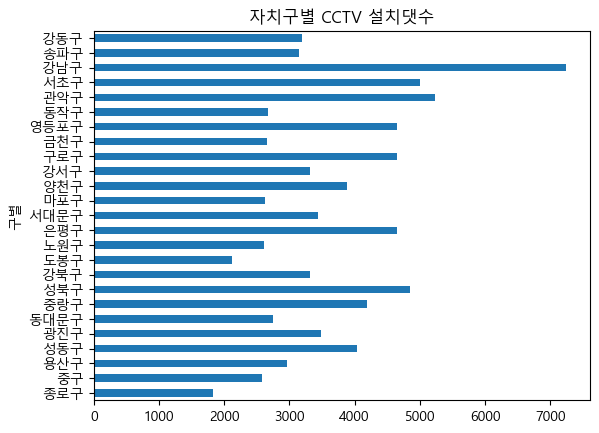

In [14]:
df.CCTV댓수.plot(kind='barh')
plt.title('자치구별 CCTV 설치댓수');

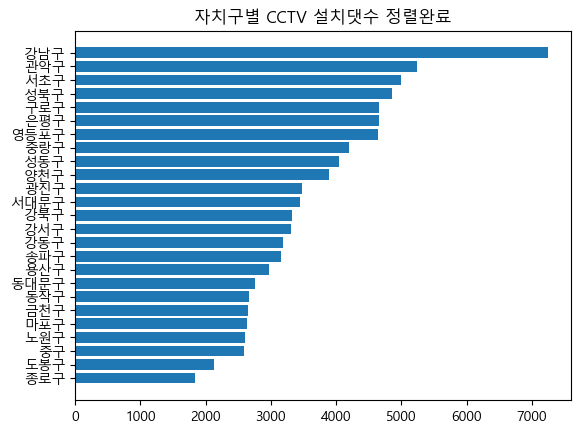

In [15]:
# CCTV 댓수로 정렬하고, plt.barh()로 그리기
sc = df['CCTV댓수'].sort_values()
plt.barh(sc.index, sc.values)
plt.title('자치구별 CCTV 설치댓수 정렬완료');

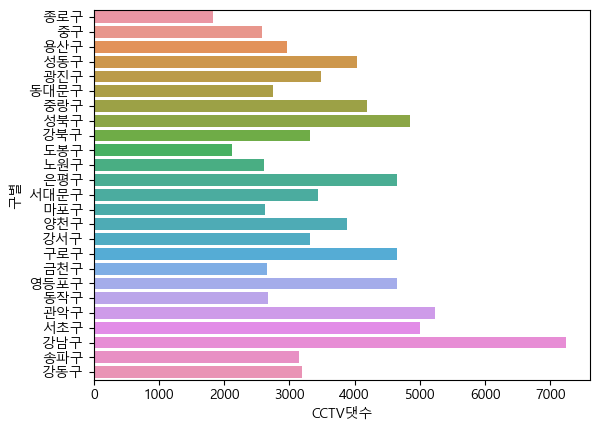

In [16]:
# Seaborn 으로 그리기
sns.barplot(data=df, y=df.index, x='CCTV댓수');

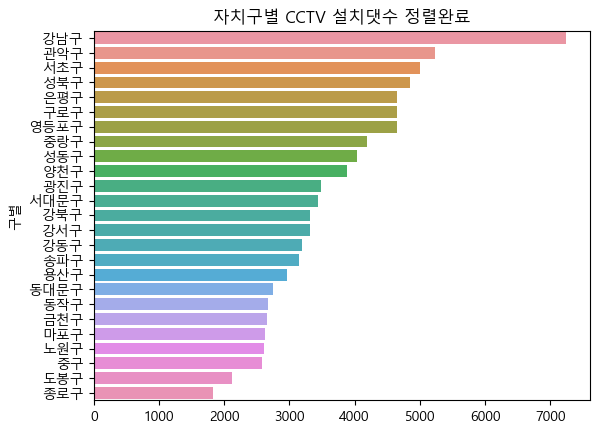

In [17]:
scr = df['CCTV댓수'].sort_values(ascending=False)
sns.barplot(y=scr.index, x=scr.values)
plt.title('자치구별 CCTV 설치댓수 정렬완료');

##### 2. 구별 인당 CCTV 댓수 그리기 - plt.barh()

In [18]:
df['인당댓수'] = (df['CCTV댓수']/ df['인구수'])
df.tail()

,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,인당댓수
구별,,,,,,,,,
관악구,5239,20.77,502628,487815,14813,83420,2.95,16.60,0.010423
서초구,4995,37.32,408979,404831,4148,63328,1.01,15.48,0.012213
강남구,7243,26.30,537817,532798,5019,83097,0.93,15.45,0.013467
송파구,3154,25.97,663704,658006,5698,105161,0.86,15.84,0.004752
강동구,3190,42.79,464027,459982,4045,79706,0.87,17.18,0.006875


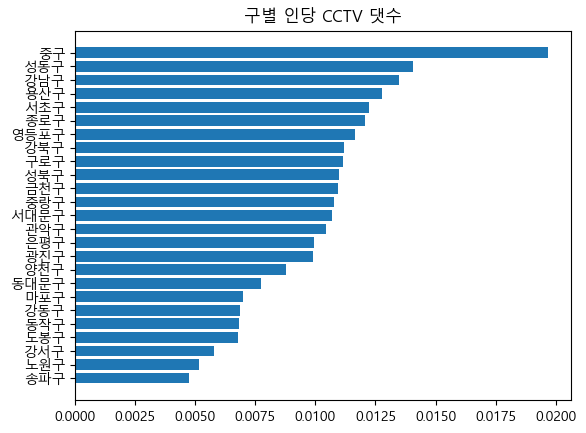

In [19]:
pc = df['인당댓수'].sort_values()
plt.barh(pc.index, pc.values)
plt.title('구별 인당 CCTV 댓수');

##### 3. 구별 외국인당 CCTV 댓수 - Seaborn

In [20]:
df['외국인당'] =(df['CCTV댓수']/ df['외국인'])
df.tail()

,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,인당댓수,외국인당
구별,,,,,,,,,,
관악구,5239,20.77,502628,487815,14813,83420,2.95,16.60,0.010423,0.353676
서초구,4995,37.32,408979,404831,4148,63328,1.01,15.48,0.012213,1.204195
강남구,7243,26.30,537817,532798,5019,83097,0.93,15.45,0.013467,1.443116
송파구,3154,25.97,663704,658006,5698,105161,0.86,15.84,0.004752,0.553528
강동구,3190,42.79,464027,459982,4045,79706,0.87,17.18,0.006875,0.788628


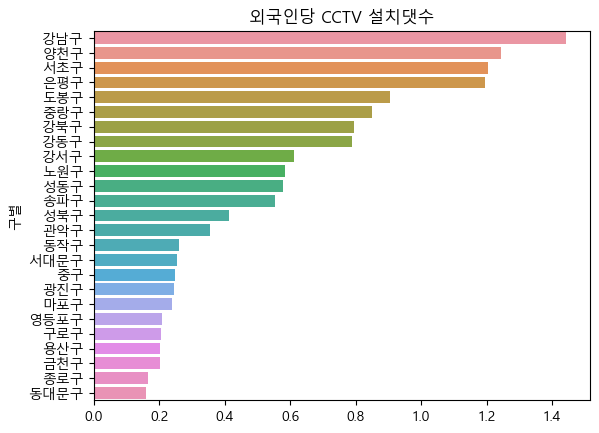

In [21]:
fc = df['외국인당'].sort_values(ascending=False)
sns.barplot(y=fc.index, x=fc.values)
plt.title('외국인당 CCTV 설치댓수');

##### 4. 인구수와 CCTV 댓수 분석

- 산점도

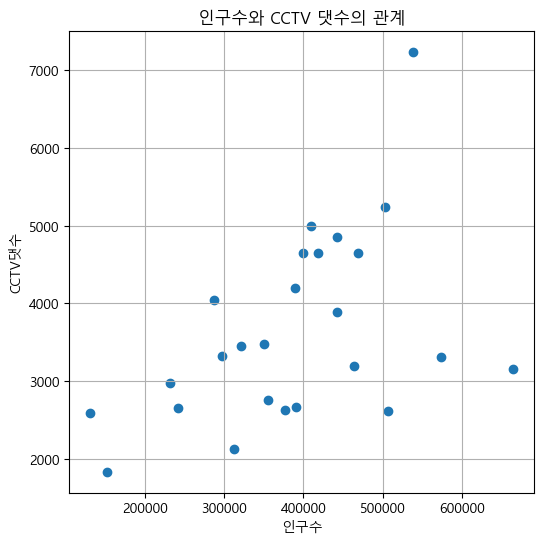

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(df['인구수'], df['CCTV댓수'])   # x축, y축
plt.title('인구수와 CCTV 댓수의 관계')
plt.grid(), plt.xlabel('인구수'), plt.ylabel('CCTV댓수')
plt.show()

- 회귀선

In [26]:
fp1 = np.polyfit(df['인구수'], df['CCTV댓수'], 1)        # polyfit : poly는 1,2,3차식을 말함, 여기서 1은 1차식을 하겠다!
fp1                 # [기울기, 절편]

array([4.52184187e-03, 1.89611186e+03])

In [27]:
fx = np.array([100000, 700000])
fy = fx * fp1[0] + fp1[1]
fy

array([2348.29605146, 5061.40117469])

In [29]:
f1 = np.poly1d(fp1)         # np.poly1d : x값을 주면 y값을 구해주는 함수
fy = f1(fx)         
fy

array([2348.29605146, 5061.40117469])

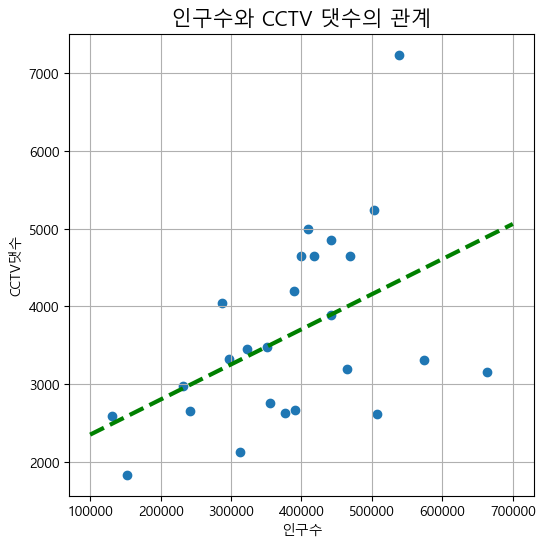

In [28]:
plt.figure(figsize=(6,6))
plt.scatter(df['인구수'], df['CCTV댓수'])
plt.plot(fx,fy, 'g--', lw=3)
plt.title('인구수와 CCTV 댓수의 관계', fontsize=15)
plt.grid(), plt.xlabel('인구수'), plt.ylabel('CCTV댓수')
plt.show()

- 오차의 절대값

In [31]:
df['오차'] = abs(df['CCTV댓수'] - f1(df['인구수'])).round(1)  # 회귀선과 산점도의 차이가 큰것을 구함
df.head(3)

,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,인당댓수,외국인당,오차
구별,,,,,,,,,,,
종로구,1835,28.77,152212,141060,11152,28265,7.33,18.57,0.012056,0.164544,749.4
중구,2584,34.87,131390,120963,10427,25353,7.94,19.30,0.019667,0.247818,93.8
용산구,2970,50.81,232482,217756,14726,39478,6.33,16.98,0.012775,0.201684,22.6


In [32]:
# 오차의 내림차순으로 정렬
df.sort_values(by='오차', ascending=False).head()

,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,인당댓수,외국인당,오차
구별,,,,,,,,,,,
강남구,7243,26.30,537817,532798,5019,83097,0.93,15.45,0.013467,1.443116,2915.0
송파구,3154,25.97,663704,658006,5698,105161,0.86,15.84,0.004752,0.553528,1743.3
노원구,2608,28.60,506989,502515,4474,93279,0.88,18.40,0.005144,0.582924,1580.6
서초구,4995,37.32,408979,404831,4148,63328,1.01,15.48,0.012213,1.204195,1249.5
도봉구,2126,64.06,312858,310509,2349,68114,0.75,21.77,0.006795,0.905066,1184.8


In [33]:
# 정렬된 데이터에서 Top 10만 골라내기
df_sort = df.sort_values(by='오차', ascending=False).head(10)
df_sort

,CCTV댓수,최근증가율,인구수,내국인,외국인,고령자,외국인 비율,고령자 비율,인당댓수,외국인당,오차
구별,,,,,,,,,,,
강남구,7243,26.30,537817,532798,5019,83097,0.93,15.45,0.013467,1.443116,2915.0
송파구,3154,25.97,663704,658006,5698,105161,0.86,15.84,0.004752,0.553528,1743.3
노원구,2608,28.60,506989,502515,4474,93279,0.88,18.40,0.005144,0.582924,1580.6
서초구,4995,37.32,408979,404831,4148,63328,1.01,15.48,0.012213,1.204195,1249.5
도봉구,2126,64.06,312858,310509,2349,68114,0.75,21.77,0.006795,0.905066,1184.8
강서구,3312,42.27,573711,568287,5424,98659,0.95,17.20,0.005773,0.610619,1178.3
관악구,5239,20.77,502628,487815,14813,83420,2.95,16.60,0.010423,0.353676,1070.1
동작구,2664,31.38,390377,380201,10176,68766,2.61,17.62,0.006824,0.261792,997.3
마포구,2628,22.53,376542,365570,10972,56582,2.91,15.03,0.006979,0.239519,970.8


- 최종 그림

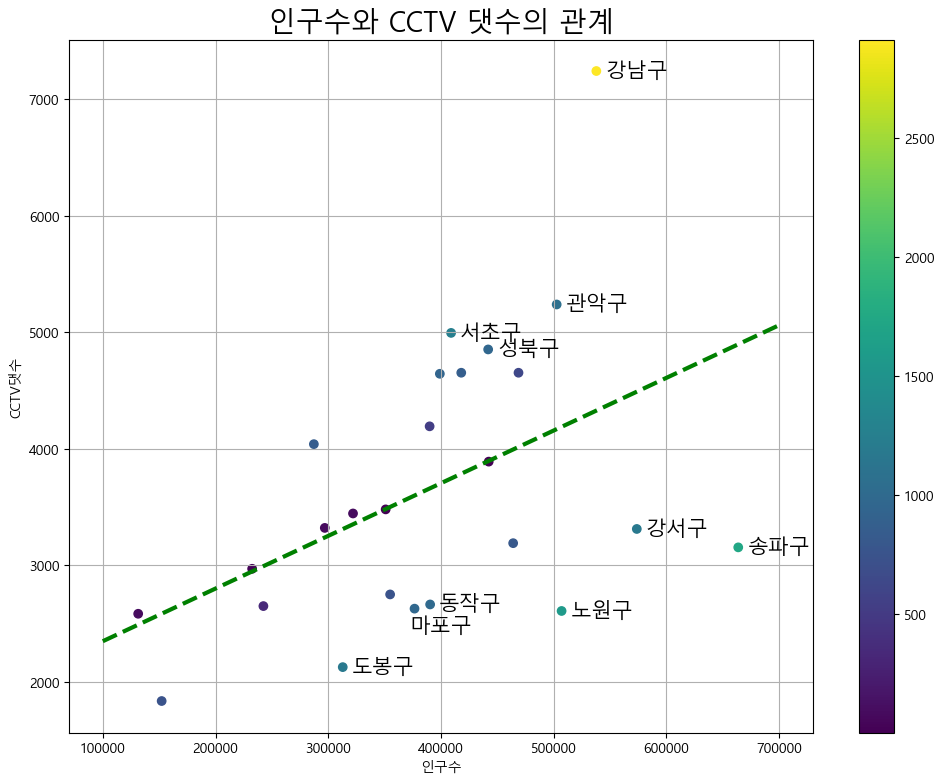

In [43]:
plt.figure(figsize=(12,9))
plt.scatter(df['인구수'], df['CCTV댓수'], c=df['오차'])
plt.plot(fx,fy, 'g--', lw=3)

for i in range(10):
    if i == 8:
        continue
    plt.text(df_sort['인구수'][i]+8000, df_sort['CCTV댓수'][i]-50, df_sort.index[i], fontsize=15)
plt.text(df_sort['인구수'][8]-5000, df_sort['CCTV댓수'][8]-200, df_sort.index[8], fontsize=15)      #마포구 글자가 겹치지 않게!

plt.title('인구수와 CCTV 댓수의 관계', fontsize=20)
plt.grid(), plt.xlabel('인구수'), plt.ylabel('CCTV댓수')
plt.colorbar()
plt.show()